# 移动平均策略

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'      #设置字体解决一些乱码问题
import warnings;warnings.simplefilter('ignore')

In [2]:
sns.set()
import numpy as np
import pandas as pd 
import tushare as ts

## 数据准备

In [3]:
data = ts.get_k_data('hs300', start='2015-01-01', end='2019-05-20')  #用tushare获取数据

In [4]:
data = pd.DataFrame(data)    #将数据转换为dataframe tushare 输出的本来就是dataframe 但是其他API获得的数据不一定是dataframne

In [5]:
data.head(10)

,date,open,close,high,low,volume,code
0,2015-01-05,3566.09,3641.54,3669.04,3551.51,451198098.0,hs300
1,2015-01-06,3608.43,3641.06,3683.23,3587.23,420962185.0,hs300
2,2015-01-07,3620.92,3643.79,3671.19,3601.70,320191232.0,hs300
3,2015-01-08,3650.07,3559.26,3659.95,3552.10,295003045.0,hs300
4,2015-01-09,3547.57,3546.72,3689.75,3536.40,349982672.0,hs300
5,2015-01-12,3531.51,3513.58,3560.53,3461.32,266567175.0,hs300
6,2015-01-13,3506.45,3514.04,3550.16,3494.77,187153965.0,hs300
7,2015-01-14,3522.91,3502.42,3547.24,3471.56,196012510.0,hs300
8,2015-01-15,3501.72,3604.12,3604.12,3482.27,237812338.0,hs300
9,2015-01-16,3616.25,3635.15,3662.16,3601.26,282681614.0,hs300


In [6]:
data.rename(columns={'close':'price'}, inplace=True)     #将close列名，重命名为price

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1065 entries, 0 to 1064
Data columns (total 7 columns):
date      1065 non-null object
open      1065 non-null float64
price     1065 non-null float64
high      1065 non-null float64
low       1065 non-null float64
volume    1065 non-null float64
code      1065 non-null object
dtypes: float64(5), object(2)
memory usage: 66.6+ KB


In [8]:
data.set_index('date', inplace=True)   #将日期作为index

In [13]:
data['SMA_10'] = data['price'].rolling(window=10, min_periods=0).mean()    #计算滑动平均

In [14]:
del data['SMA']
data.head(10)

,open,price,high,low,volume,code,SMA_10
date,,,,,,,
2015-01-05,3566.09,3641.54,3669.04,3551.51,451198098.0,hs300,3641.540000
2015-01-06,3608.43,3641.06,3683.23,3587.23,420962185.0,hs300,3641.300000
2015-01-07,3620.92,3643.79,3671.19,3601.70,320191232.0,hs300,3642.130000
2015-01-08,3650.07,3559.26,3659.95,3552.10,295003045.0,hs300,3621.412500
2015-01-09,3547.57,3546.72,3689.75,3536.40,349982672.0,hs300,3606.474000
2015-01-12,3531.51,3513.58,3560.53,3461.32,266567175.0,hs300,3590.991667
2015-01-13,3506.45,3514.04,3550.16,3494.77,187153965.0,hs300,3579.998571
2015-01-14,3522.91,3502.42,3547.24,3471.56,196012510.0,hs300,3570.301250
2015-01-15,3501.72,3604.12,3604.12,3482.27,237812338.0,hs300,3574.058889


In [15]:
data['SMA_60']=data['price'].rolling(window=60, min_periods=0).mean()
data.head()

,open,price,high,low,volume,code,SMA_10,SMA_60
date,,,,,,,,
2015-01-05,3566.09,3641.54,3669.04,3551.51,451198098.0,hs300,3641.5400,3641.5400
2015-01-06,3608.43,3641.06,3683.23,3587.23,420962185.0,hs300,3641.3000,3641.3000
2015-01-07,3620.92,3643.79,3671.19,3601.70,320191232.0,hs300,3642.1300,3642.1300
2015-01-08,3650.07,3559.26,3659.95,3552.10,295003045.0,hs300,3621.4125,3621.4125
2015-01-09,3547.57,3546.72,3689.75,3536.40,349982672.0,hs300,3606.4740,3606.4740


In [16]:
data.tail()

,open,price,high,low,volume,code,SMA_10,SMA_60
date,,,,,,,,
2019-05-14,3630.44,3645.15,3683.26,3630.44,102313460.0,hs300,3741.959,3802.018667
2019-05-15,3674.99,3727.09,3741.04,3674.99,110161769.0,hs300,3725.741,3807.434500
2019-05-16,3720.04,3743.96,3745.14,3707.90,116258274.0,hs300,3710.104,3814.188833
2019-05-17,3744.88,3648.76,3745.36,3637.58,128453245.0,hs300,3683.659,3817.572500
2019-05-20,3635.74,3617.79,3644.50,3583.83,108963477.0,hs300,3676.976,3820.542167


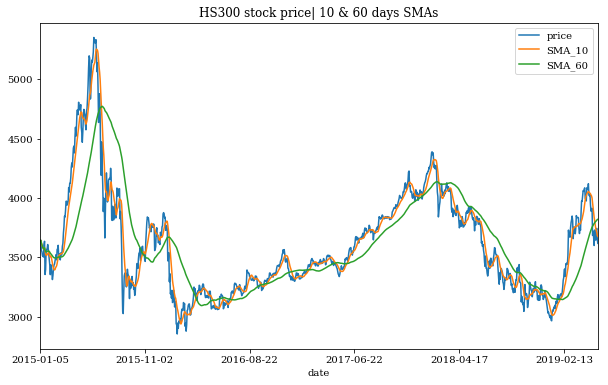

In [18]:
data[['price','SMA_10','SMA_60']].plot(title='HS300 stock price| 10 & 60 days SMAs', figsize=(10,6))

## 策略开发思路

In [19]:
data['position'] = np.where(data['SMA_10'] > data['SMA_60'], 1, -1)    #上穿置为1，下穿置为-1，根据交易条件找出交易位置

In [20]:
data.dropna(inplace=True)  #去掉空值,之前将min_periods设为0，就不会有空值了

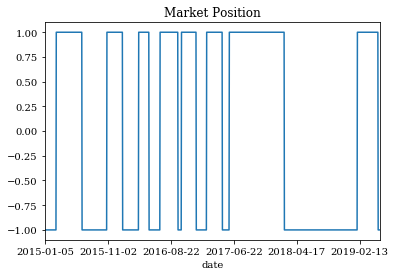

In [22]:
data['position'].plot(ylim=[-1.1, 1.1], title='Market Position')

In [23]:
data.head()

,open,price,high,low,volume,code,SMA_10,SMA_60,position
date,,,,,,,,,
2015-01-05,3566.09,3641.54,3669.04,3551.51,451198098.0,hs300,3641.5400,3641.5400,-1
2015-01-06,3608.43,3641.06,3683.23,3587.23,420962185.0,hs300,3641.3000,3641.3000,-1
2015-01-07,3620.92,3643.79,3671.19,3601.70,320191232.0,hs300,3642.1300,3642.1300,-1
2015-01-08,3650.07,3559.26,3659.95,3552.10,295003045.0,hs300,3621.4125,3621.4125,-1
2015-01-09,3547.57,3546.72,3689.75,3536.40,349982672.0,hs300,3606.4740,3606.4740,-1


## 计算策略年化收益并可视化

In [24]:
data['return'] = np.log(data['price']/data['price'].shift(1))    #计算股票连续收益，np进行向量化操作，减少python层面的循环

In [ ]:
# data['return_dis'] = data['price']/data['price'].shifr(1)-1      #计算离散收益

In [ ]:
# data['return_dis']= data['price].pct_change()                #计算离散收益方法2

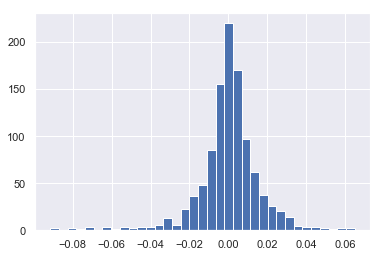

In [26]:
sns.set()
data['return'].hist(bins=35)

In [27]:
data['strategy'] = data['position'].shift(1) * data['return']   #计算策略收益 ；注意未来函数一般会使得收益高估，只有收盘的时候才能确定position，所以需要用position.shift(1)

In [28]:
data[['return','strategy']].sum()      #这里的收益没有考虑复权

return     -0.006543
strategy    0.808761
dtype: float64

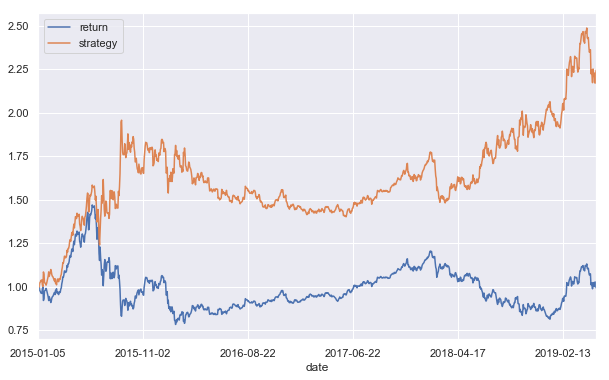

In [29]:
data[['return','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))    #可视化 

In [ ]:
# 低胜率，高收益，能够抓住大盘趋势

## 策略收益风险评估

In [30]:
# 计算年化收益率
data[['return','strategy']].mean() * 252

return     -0.001550
strategy    0.191549
dtype: float64

In [31]:
# 年化风险
data[['return','strategy']].std()*252**0.5

return      0.258129
strategy    0.257847
dtype: float64

In [33]:
# 计算累计收益
data['cumret'] = data['strategy'].cumsum().apply(np.exp)

In [35]:
data['cummax'] = data['cumret'].cummax()    #计算累计最大值

In [36]:
data.tail()

,open,price,high,low,volume,code,SMA_10,SMA_60,position,return,strategy,cumret,cummax
date,,,,,,,,,,,,,
2019-05-14,3630.44,3645.15,3683.26,3630.44,102313460.0,hs300,3741.959,3802.018667,-1,-0.006448,0.006448,2.228272,2.486644
2019-05-15,3674.99,3727.09,3741.04,3674.99,110161769.0,hs300,3725.741,3807.434500,-1,0.022230,-0.022230,2.179283,2.486644
2019-05-16,3720.04,3743.96,3745.14,3707.90,116258274.0,hs300,3710.104,3814.188833,-1,0.004516,-0.004516,2.169464,2.486644
2019-05-17,3744.88,3648.76,3745.36,3637.58,128453245.0,hs300,3683.659,3817.572500,-1,-0.025756,0.025756,2.226067,2.486644
2019-05-20,3635.74,3617.79,3644.50,3583.83,108963477.0,hs300,3676.976,3820.542167,-1,-0.008524,0.008524,2.245124,2.486644


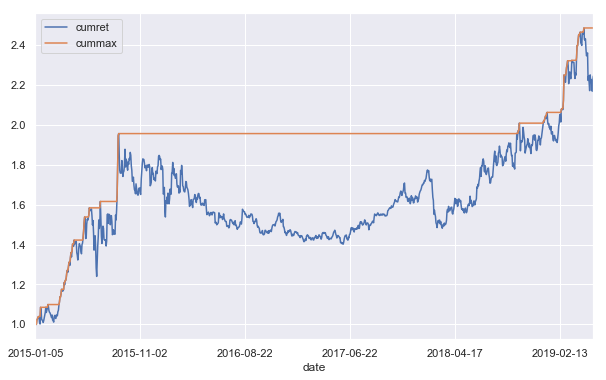

In [38]:
data[['cumret','cummax']].plot(figsize=(10,6))

In [39]:
drawdown = (data['cummax'] - data['cumret'])   #计算回撤值

In [40]:
drawdown.max()        #计算最大回撤

0.5547448657099749

In [41]:
temp = drawdown[drawdown == 0]
temp

date
2015-01-06    0.0
2015-01-08    0.0
2015-01-09    0.0
2015-01-12    0.0
2015-01-14    0.0
2015-01-19    0.0
2015-02-02    0.0
2015-02-06    0.0
2015-03-17    0.0
2015-03-18    0.0
2015-03-20    0.0
2015-03-23    0.0
2015-03-24    0.0
2015-03-30    0.0
2015-04-01    0.0
2015-04-02    0.0
2015-04-03    0.0
2015-04-07    0.0
2015-04-08    0.0
2015-04-10    0.0
2015-04-13    0.0
2015-04-14    0.0
2015-04-16    0.0
2015-04-17    0.0
2015-04-21    0.0
2015-04-22    0.0
2015-04-23    0.0
2015-04-27    0.0
2015-05-21    0.0
2015-05-22    0.0
             ... 
2015-08-21    0.0
2015-08-24    0.0
2015-08-25    0.0
2015-08-26    0.0
2018-10-11    0.0
2018-10-16    0.0
2018-10-18    0.0
2018-12-21    0.0
2018-12-25    0.0
2018-12-26    0.0
2018-12-27    0.0
2019-01-02    0.0
2019-01-03    0.0
2019-02-18    0.0
2019-02-20    0.0
2019-02-22    0.0
2019-02-25    0.0
2019-03-01    0.0
2019-03-04    0.0
2019-03-05    0.0
2019-03-06    0.0
2019-03-18    0.0
2019-03-29    0.0
2019-04-01    0.0
2019-

In [47]:
periods = pd.to_datetime(temp.index[1:]) - pd.to_datetime(temp.index[:-1])

In [48]:
periods

TimedeltaIndex([   '2 days',    '1 days',    '3 days',    '2 days',
                   '5 days',   '14 days',    '4 days',   '39 days',
                   '1 days',    '2 days',    '3 days',    '1 days',
                   '6 days',    '2 days',    '1 days',    '1 days',
                   '4 days',    '1 days',    '2 days',    '3 days',
                   '1 days',    '2 days',    '1 days',    '4 days',
                   '1 days',    '1 days',    '4 days',   '24 days',
                   '1 days',    '3 days',    '1 days',   '10 days',
                   '3 days',   '30 days',   '44 days',    '3 days',
                   '1 days',    '1 days', '1142 days',    '5 days',
                   '2 days',   '64 days',    '4 days',    '1 days',
                   '1 days',    '6 days',    '1 days',   '46 days',
                   '2 days',    '2 days',    '3 days',    '4 days',
                   '3 days',    '1 days',    '1 days',   '12 days',
                  '11 days',    '3 days',    '2 

## 策略优化--双均线策略

In [4]:
hs300 = ts.get_k_data('hs300','2017-01-01','2019-05-20')[['date','close']]     #只调取date,price
hs300 = pd.DataFrame(hs300)
hs300.rename(columns={'close':'price'}, inplace=True)
hs300.set_index('date', inplace=True)
hs300.head(10)

,price
date,
2017-01-03,3342.23
2017-01-04,3368.31
2017-01-05,3367.79
2017-01-06,3347.67
2017-01-09,3363.90
2017-01-10,3358.27
2017-01-11,3334.50
2017-01-12,3317.62
2017-01-13,3319.91


In [11]:
hs300['SMA_1'] = hs300['price'].rolling(window=10, min_periods=0).mean()

In [10]:
hs300['SMA_2'] = hs300['price'].rolling(60).mean()   

In [12]:
hs300.tail()

,price,SMA_1,SMA_2
date,,,
2019-05-14,3645.15,3741.959,3802.018667
2019-05-15,3727.09,3725.741,3807.434500
2019-05-16,3743.96,3710.104,3814.188833
2019-05-17,3648.76,3683.659,3817.572500
2019-05-20,3617.79,3676.976,3820.542167


In [13]:
hs300.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 2017-01-03 to 2019-05-20
Data columns (total 3 columns):
price    577 non-null float64
SMA_1    577 non-null float64
SMA_2    518 non-null float64
dtypes: float64(3)
memory usage: 18.0+ KB


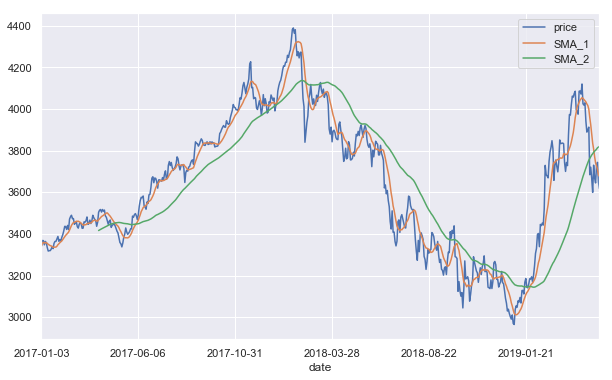

In [15]:
hs300[['price','SMA_1','SMA_2']].plot(figsize=(10, 6))

In [16]:
hs300['10-60'] = hs300['SMA_1'] - hs300['SMA_2']
hs300['10-60'].tail()

date
2019-05-14    -60.059667
2019-05-15    -81.693500
2019-05-16   -104.084833
2019-05-17   -133.913500
2019-05-20   -143.566167
Name: 10-60, dtype: float64

In [21]:
SD = 20 #设定阈值  计算交易信号
hs300['regime'] = np.where(hs300['10-60']>SD, 1, 0)     #只有超过仓位才买入
hs300['regime'] = np.where(hs300['10-60']<-SD, -1, hs300['regime']) #只有低于仓位才卖出
hs300['regime'].value_counts()  #累计各个值出现的次数

-1    246
 1    242
 0     89
Name: regime, dtype: int64

In [22]:
hs300['Market'] = np.log(hs300['price']/hs300['price'].shift(1))  #计算市场收益

In [23]:
hs300['Strategy'] = hs300['regime'].shift(1)*hs300['Market']   #计算策略收益

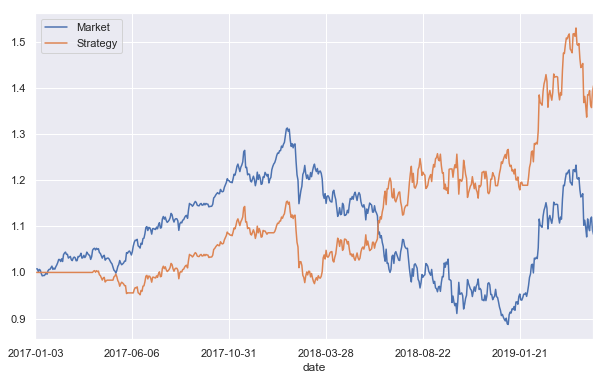

In [24]:
hs300[['Market','Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))